In [1]:
%pylab inline
plt.rc('font',size=20)

Populating the interactive namespace from numpy and matplotlib


## MCH example.

In [12]:
from solvers import *
from utils import *

calc_e,_ = define_ising_mch_helpers()

In [13]:
# Generate example data set.
n = 5
allstates = bin_states(n,True)

p = random.rand(2**n)
p /= p.sum()

sample = allstates[random.choice(range(2**n),size=100,replace=True,p=p)]
sisj = pair_corr(sample,concat=True)

In [15]:
# Declare and call solver.
solver = MPF(n,calc_e=calc_e)
soln = solver.solve(sample)

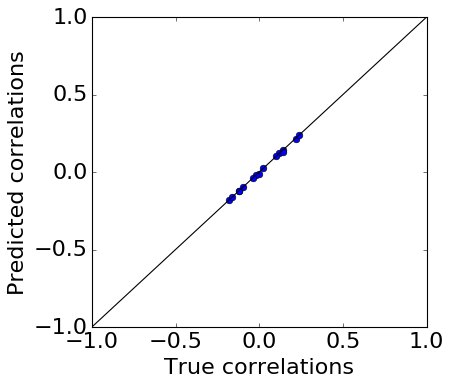

In [16]:
from tosolve11 import tosolve5

fig,ax = plt.subplots(figsize=(5.4,5))
ax.plot(sisj,tosolve5.get_stats(soln[0]),'o')
ax.plot([-1,1],[-1,1],'k-')
ax.set(xlabel='True correlations',ylabel='Predicted correlations')

## MPF example.

In [12]:
from solvers import *
from utils import *

calc_e,_ = define_ising_mch_helpers()

In [13]:
# Generate example data set.
n = 5
allstates = bin_states(n,True)

p = random.rand(2**n)
p /= p.sum()

sample = allstates[random.choice(range(2**n),size=100,replace=True,p=p)]
sisj = pair_corr(sample,concat=True)

In [15]:
# Declare and call solver.
solver = MPF(n,calc_e=calc_e)
soln = solver.solve(sample)

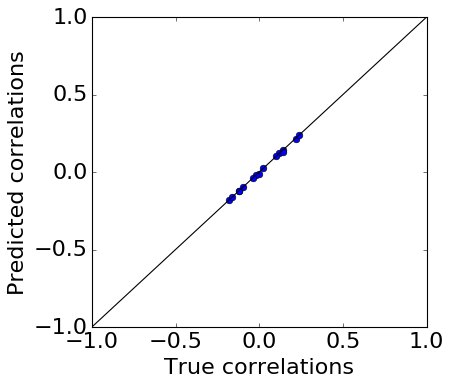

In [16]:
from tosolve11 import tosolve5

fig,ax = plt.subplots(figsize=(5.4,5))
ax.plot(sisj,tosolve5.get_stats(soln[0]),'o')
ax.plot([-1,1],[-1,1],'k-')
ax.set(xlabel='True correlations',ylabel='Predicted correlations')

## Exact example.

In [17]:
from solvers import *
from utils import *

calc_e,_ = define_ising_mch_helpers()

In [18]:
# Generate example data set.
n = 5
allstates = bin_states(n,True)
def calc_observables(J):
    E = calc_e(allstates,J)
    return pair_corr( allstates, exp(-E-logsumexp(E)),concat=True )

p = random.rand(2**n)
p /= p.sum()

sisj = pair_corr(allstates,p,concat=True)

In [19]:
# Declare and call solver.
solver = Exact(n,constraints=sisj,calc_e=calc_e,calc_observables=calc_observables)
soln = solver.solve()

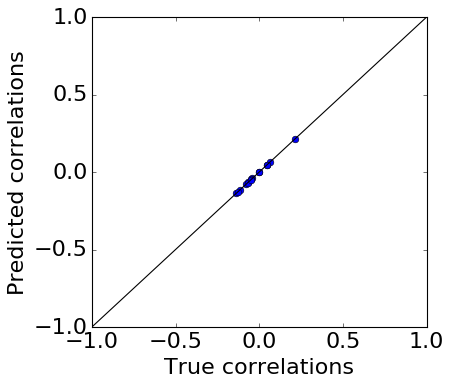

In [20]:
from tosolve11 import tosolve5

fig,ax = plt.subplots(figsize=(5.4,5))
ax.plot(sisj,tosolve5.get_stats(soln['x']),'o')
ax.plot([-1,1],[-1,1],'k-')
ax.set(xlabel='True correlations',ylabel='Predicted correlations')